# 1. IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
import pickle

# 2.LOADING DATA

In [ ]:
df=pd.read_csv('spam_ham_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


eda

# EDA on Data set

In [ ]:
df=df.drop("Unnamed: 0",axis=1)

In [ ]:
df.shape

(5171, 3)

In [ ]:
df.ndim

2

In [ ]:
df.size

15513

In [ ]:
df.isna().sum()

,0
label,0
text,0
label_num,0


# Understanding Data Type and Summary of features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [ ]:
df.describe()

,label_num
count,5171.000000
mean,0.289886
std,0.453753
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# Take care of Missing Data

In [ ]:
df.isnull().any()

,0
label,False
text,False
label_num,False


In [ ]:
df.isnull().sum()

,0
label,0
text,0
label_num,0


#Data Visualization

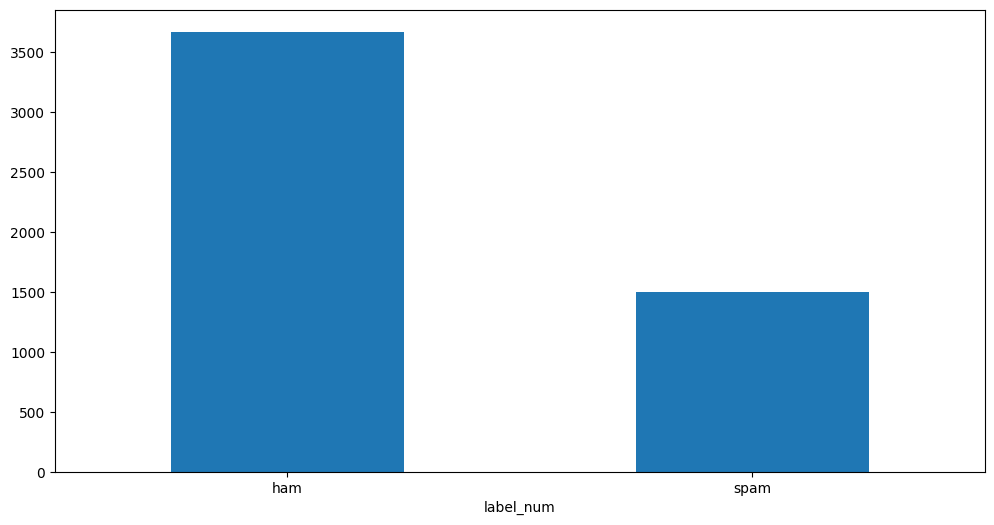

In [ ]:
df["label_num"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(np.arange(2), ("ham", "spam"),rotation=0);

# cleaning the text

In [ ]:
import re
corpus = []
length = len(df)


In [ ]:
import re
import nltk # import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

nltk.download('stopwords') # Download the stopwords resource

corpus = []
length = len(df)

for i in range(0, length):
  text = re.sub("[^a-zA-Z0-9]", " ", df["text"][i])
  text = text.lower()
  text = text.split()
  pe = PorterStemmer()
  stop_words = stopwords.words("english") # Changed variable name to stop_words to avoid overwriting the stopwords module
  text = [pe.stem(word) for word in text if not word in set(stop_words)]
  text = " ".join(text)
  corpus.append(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=35000) # Changed max_feature to max_features
X = cv.fit_transform(corpus).toarray()

In [ ]:
y=pd.get_dummies(df['label'])
y=y.iloc[:,1].values

In [ ]:
import pickle
pickle.dump(cv, open('cv-transform.pkl', 'wb'))

# Split the dataset into Train set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Model Building
* Train and Test the Model using Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [ ]:
model.fit(X_train, y_train)

MultinomialNB()

# Prediction

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([False, False, False, ..., False,  True, False])

# Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm)
print('Accuracy Score Is:- ', score*100)

[[716  16]
 [ 17 286]]
Accuracy Score Is:-  96.81159420289856


In [ ]:
from sklearn.svm import SVC
svm1=SVC(kernel='rbf')
svm1.fit(X_train,y_train)

SVC()

In [ ]:
y_pred4=svm1.predict(X_test)
from sklearn.metrics import accuracy_score
svm_rbf=accuracy_score(y_test,y_pred4)
svm_rbf

0.9623188405797102

In [ ]:
svm2=SVC(kernel='sigmoid')
svm2.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [ ]:
y_pred5=svm2.predict(X_test)
from sklearn.metrics import accuracy_score
svm_sig=accuracy_score(y_test,y_pred5)
svm_sig

0.9652173913043478

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred6=dt.predict(X_test)
from sklearn.metrics import accuracy_score
dec_tree=accuracy_score(y_test,y_pred6)
dec_tree

0.9497584541062802

In [ ]:
models = pd.DataFrame({
    'Model': ['MultinomialNB','SVC(rbf)','SVC(sigmoid)','DecisionTreeClassifier'],
    'Test Score': [score,svm_rbf,svm_sig,dec_tree]})
models.sort_values(by='Test Score', ascending=False)

,Model,Test Score
0,MultinomialNB,0.968116
2,SVC(sigmoid),0.965217
1,SVC(rbf),0.962319
3,DecisionTreeClassifier,0.949758


# Saving the model

In [ ]:
import pickle
pickle.dump(model,open("spam-sms-mnb-model.pkl","wb"))